In [1]:
#Centroid-based Distance Analysis
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'
dataset = pd.read_csv(file_path)

# Group by 'Disease_Risk' to calculate class centroids and spreads
grouped = dataset.groupby('Disease_Risk')

# Calculate the centroids (means) and spreads (standard deviations) for each class
centroids = grouped.mean(numeric_only=True)
spreads = grouped.std(numeric_only=True)

# Function to calculate the Euclidean distance between centroids of two classes
def calculate_distance(class1, class2, centroids):
    centroid1 = centroids.loc[class1].values
    centroid2 = centroids.loc[class2].values
    distance = np.linalg.norm(centroid1 - centroid2)
    return distance

# Example: Calculate the distance between centroids of class 2 and class 1
distance_2_1 = calculate_distance(1,0, centroids)

# Print centroids, spreads, and the distance between centroids of class 2 and class 1
print("Centroids:\n", centroids)
print("\nSpreads:\n", spreads)
print(f"\nDistance between centroids of class 2 and class 1: {distance_2_1}")


Centroids:
                        ID        DR      ARMD       MH        DN       MYA  \
Disease_Risk                                                                 
0             1188.334165  0.000000  0.000000  0.00000  0.000000  0.000000   
1              900.354180  0.247531  0.065833  0.20869  0.090849  0.066491   

                  BRVO      TSLN       ERM        LS  ...       CME      PTCR  \
Disease_Risk                                          ...                       
0             0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1             0.048058  0.122449  0.009217  0.030941  ...  0.002633  0.003292   

                    CF        VH       MCA        VS      BRAO       PLQ  \
Disease_Risk                                                               
0             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1             0.001975  0.000658  0.000658  0.000658  0.001317  0.000658   

                  HPED        CL  
Disease_Ri

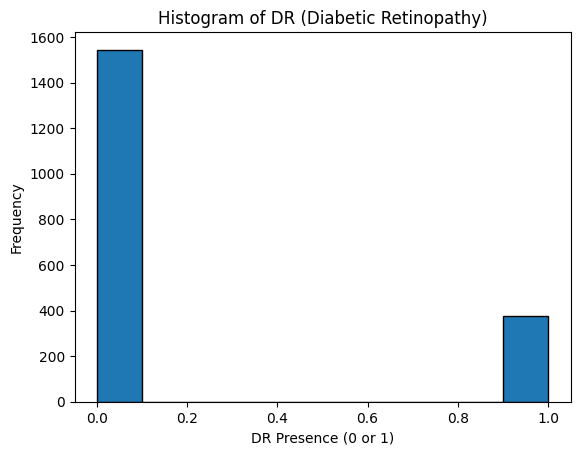

Mean: 0.19583333333333333
Variance: 0.15748263888888892


In [2]:
#2. Descriptive Statistics & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the RFMiD dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with the actual path to your RFMiD CSV file
dataset = pd.read_csv(file_path)

# Select a feature from the RFMiD dataset
# Example: Assume 'DR' (Diabetic Retinopathy) as a feature for illustration. Replace it with your chosen feature.
feature = dataset['DR']  # Replace 'DR' with the actual feature column you want to use

# Handle NaN values by dropping them
feature_clean = feature.dropna()

# Calculate the histogram data
hist_data, bin_edges = np.histogram(feature_clean, bins=10)

# Plot the histogram
plt.hist(feature_clean, bins=10, edgecolor='black')
plt.title('Histogram of DR (Diabetic Retinopathy)')
plt.xlabel('DR Presence (0 or 1)')
plt.ylabel('Frequency')
plt.savefig('DR_Presence.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.show()

# Calculate the mean and variance of the feature
mean_value = np.mean(feature_clean)
variance_value = np.var(feature_clean)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


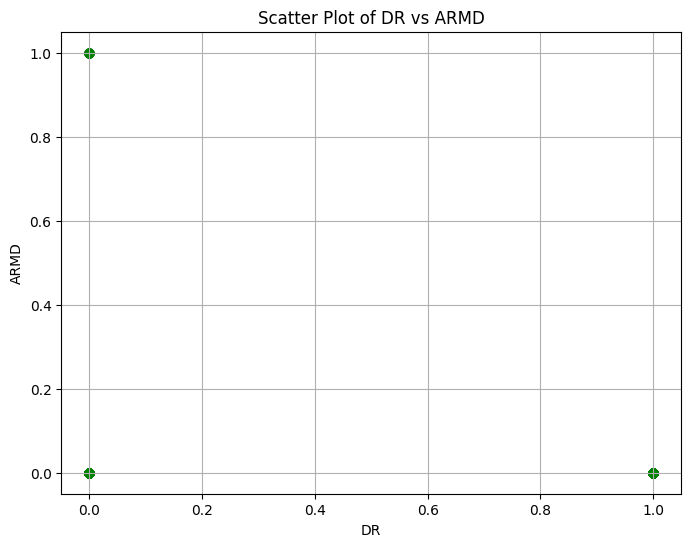

In [3]:
#3. Scatter Plot Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('RFMiD_Training_Labels.csv')

x_feature = 'DR'
y_feature = 'ARMD'


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_feature], df[y_feature], alpha=0.5, color='green')
plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.grid(True)
plt.show()


NaN values in DR: 0
NaN values in ARMD: 0
Infinite values in DR: 0
Infinite values in ARMD: 0


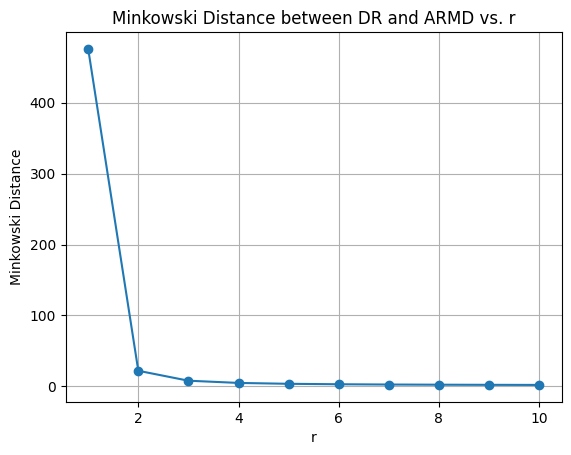

Minkowski distances for r from 1 to 10: [476.0, 21.817424229271428, 7.807925321779708, 4.670912569217222, 3.4317954219025806, 2.794266508724554, 2.412766414888757, 2.1612294115195687, 1.9838639407259124, 1.8525105726830766]


In [4]:
#4. Minkowski Distance Calculation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the RFMiD dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with the actual path to your RFMiD dataset
dataset = pd.read_csv(file_path)

# Select two feature vectors, e.g., 'DR' (Diabetic Retinopathy) and 'ARMD' (Age-related Macular Degeneration)
# Replace these columns with the features you want to analyze
feature_1 = dataset['DR']   # e.g., 'DR'(Diabetic Retinopathy)
feature_2 = dataset['ARMD']  # e.g. 'ARMD'(Age-related Macular Degeneration)

# Check for NaN or infinite values
print("NaN values in DR:", feature_1.isna().sum())
print("NaN values in ARMD:", feature_2.isna().sum())
print("Infinite values in DR:", np.isinf(feature_1).sum())
print("Infinite values in ARMD:", np.isinf(feature_2).sum())

# Remove rows with NaN or infinite values
cleaned_dataset = dataset.dropna(subset=['DR', 'ARMD'])
cleaned_dataset = cleaned_dataset[~np.isinf(cleaned_dataset['DR']) & ~np.isinf(cleaned_dataset['ARMD'])]

# Extract cleaned feature vectors
feature_1 = cleaned_dataset['DR']
feature_2 = cleaned_dataset['ARMD']

# Calculate the Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [minkowski(feature_1, feature_2, p=r) for r in r_values]

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between DR and ARMD vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.savefig('Minkowski Distance DR and ARMD.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()

# Display the distances
print("Minkowski distances for r from 1 to 10:", distances)


In [5]:
#5. Train-Test Split
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Display the unique classes in the target variable
print("Unique classes in 'Disease_Risk':", df['Disease_Risk'].unique())

# Define the classes you want to filter
class_a = 1   # 1 - Present
class_b = 0 #  0 - Not Present 

# Filter the DataFrame for only these two classes
filtered_df = df[df['Disease_Risk'].isin([class_a, class_b])]

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    raise ValueError(f"No samples found for classes: {class_a} and {class_b}")

# Define features (X) and target (y) from the filtered DataFrame
X = filtered_df.drop('Disease_Risk', axis=1)  # Features are all columns except the target
y = filtered_df['Disease_Risk']  # Target is the 'Disease_Risk' column

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:", y_test.shape)


Unique classes in 'Disease_Risk': [1 0]
Training set shape: (1344, 46)
Test set shape: (576, 46)
y_train shape: (1344,)
y_test shape: (576,)


In [6]:
# 6. Model Evaluation with k-Nearest Neighbors (kNN)
# Create the kNN classifier with k=3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Make predictions
y_pred = neigh.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


In [7]:
#7.Testing kNN Classifier Accuracy and Generating Metrics (Classification Report & Confusion Matrix)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# A6: Test the accuracy of the kNN classifier using the test set
accuracy = neigh.score(X_test, y_test)
print(f"Accuracy of kNN classifier: {accuracy:.2f}")

# Generate predictions for more detailed metrics
y_pred = neigh.predict(X_test)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy report
print("=== Classification Report ===")
print(classification_report)
print("=== Confusion Matrix ===")
print(confusion_matrix)


Accuracy of kNN classifier: 0.81
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.55      0.35      0.43       119
           1       0.85      0.93      0.88       457

    accuracy                           0.81       576
   macro avg       0.70      0.64      0.66       576
weighted avg       0.79      0.81      0.79       576

=== Confusion Matrix ===
[[ 42  77]
 [ 34 423]]


In [8]:
#8 Training and Testing kNN Classifier for Disease Risk Prediction
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Define the classes you want to filter
class_a = 1   # 1 - Present
class_b = 0   # 0 - Not Present 

# Filter the DataFrame for only these two classes
filtered_df = df[df['Disease_Risk'].isin([class_a, class_b])]

# Define features (X) and target (y) from the filtered DataFrame
X = filtered_df.drop('Disease_Risk', axis=1)
y = filtered_df['Disease_Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Use the predict() function to predict class labels for the test set
y_pred = neigh.predict(X_test)

# Print the predicted classes for the test set
print("Predicted classes for the test set:")
print(y_pred)

# Predict the class for a specific test vector
# Choose a specific index from the test set to test
test_index = 0  # Replace with the index of the test vector you want to classify

# Use .iloc to access the row by index without converting to a NumPy array
test_vect = X_test.iloc[test_index:test_index + 1]  # Keep it as a DataFrame

# Perform classification
test_prediction = neigh.predict(test_vect)
print(f'Predicted class for test vector at index {test_index}: {test_prediction[0]}')


Predicted classes for the test set:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1

Accuracy with k=1: 1.00
Accuracy with k=2: 0.99
Accuracy with k=3: 0.99
Accuracy with k=4: 0.99
Accuracy with k=5: 0.99
Accuracy with k=6: 0.99
Accuracy with k=7: 0.99
Accuracy with k=8: 0.99
Accuracy with k=9: 0.99
Accuracy with k=10: 0.99
Accuracy with k=11: 0.99


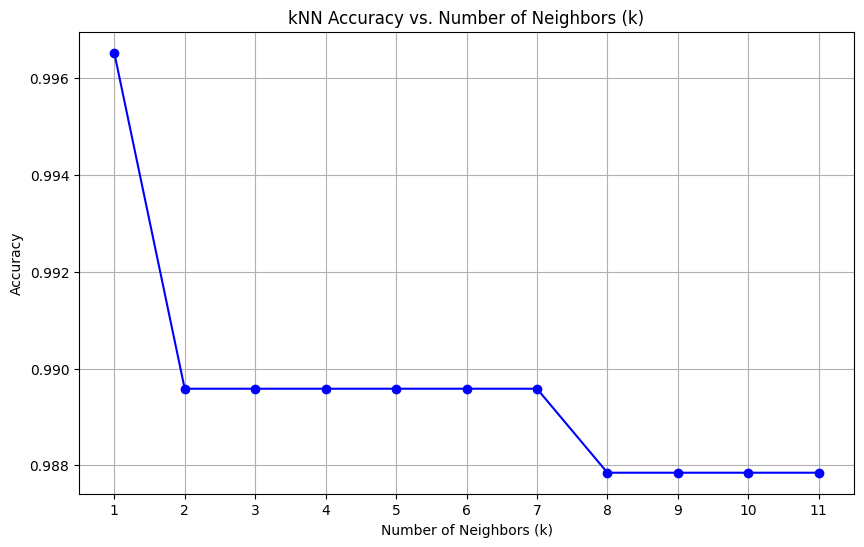


Comparison:
Accuracy with k=1: 1.00
Accuracy with k=3: 0.99


In [9]:
#9. Evaluating kNN Classifier with Varying k Values
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define the label column
label_column = 'Disease_Risk'  # Replace with the actual label column name in your dataset

# Separate features and labels
X = df.drop(columns=[label_column])  # Drop the label column to get features
y = df[label_column]  # The label column (target)

# Handle missing values in the target variable
y = y.dropna()  # Drop rows with missing target values

# Align X with y after dropping missing values
X = X.loc[y.index]

# Identify numeric columns (since the dataset is entirely numeric)
numeric_cols = X.columns.tolist()

# Create a preprocessing pipeline with imputation and scaling
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values for numeric features
    ('scaler', StandardScaler())  # Scale numeric features
])

# Create a pipeline with preprocessing and kNN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())  # Default k=5, we will modify this later
])

# Function to evaluate kNN classifier for different k values
def evaluate_knn(k):
    pipeline.set_params(classifier__n_neighbors=k)  # Set the number of neighbors
    pipeline.fit(X_train, y_train)  # Fit the model
    y_pred = pipeline.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    return accuracy

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List to store accuracy values for different k values
accuracy_list = []

# Evaluate kNN for k from 1 to 11
for k in range(1, 12):
    accuracy = evaluate_knn(k)
    accuracy_list.append(accuracy)
    print(f'Accuracy with k={k}: {accuracy:.2f}')

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('kNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.savefig('KNN_Accuracy.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()

# Compare k=1 and k=3
accuracy_k1 = evaluate_knn(1)
accuracy_k3 = evaluate_knn(3)

print(f'\nComparison:\nAccuracy with k=1: {accuracy_k1:.2f}')
print(f'Accuracy with k=3: {accuracy_k3:.2f}')


In [10]:
#10 Model Overfitting or Underfitting Check
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Define the classes you want to filter
class_a = 1   # 1 - Present
class_b = 0   # 0 - Not Present 

# Filter the DataFrame for only these two classes
filtered_df = df[df['Disease_Risk'].isin([class_a, class_b])]

# Define features (X) and target (y) from the filtered DataFrame
X = filtered_df.drop('Disease_Risk', axis=1)
y = filtered_df['Disease_Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Use the model to predict on both training and test sets
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Evaluate confusion matrix and classification report for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

# Evaluate confusion matrix and classification report for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Print the results
print("=== Confusion Matrix for Training Data ===")
print(conf_matrix_train)

print("\n=== Classification Report for Training Data ===")
print(class_report_train)

print("=== Confusion Matrix for Test Data ===")
print(conf_matrix_test)

print("\n=== Classification Report for Test Data ===")
print(class_report_test)



# Observations and inference
if (conf_matrix_train[0][0] + conf_matrix_train[1][1]) > (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be overfitting.")
elif (conf_matrix_train[0][0] + conf_matrix_train[1][1]) < (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is fitting well (regular fit).")


=== Confusion Matrix for Training Data ===
[[ 168  114]
 [  32 1030]]

=== Classification Report for Training Data ===
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       282
           1       0.90      0.97      0.93      1062

    accuracy                           0.89      1344
   macro avg       0.87      0.78      0.82      1344
weighted avg       0.89      0.89      0.88      1344

=== Confusion Matrix for Test Data ===
[[ 42  77]
 [ 34 423]]

=== Classification Report for Test Data ===
              precision    recall  f1-score   support

           0       0.55      0.35      0.43       119
           1       0.85      0.93      0.88       457

    accuracy                           0.81       576
   macro avg       0.70      0.64      0.66       576
weighted avg       0.79      0.81      0.79       576


The model may be overfitting.


In [11]:
#11 Model Overfitting or Underfitting Check
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
dataset = pd.read_csv('RFMiD_Training_Labels.csv')  

# Features and target
X = dataset.drop(columns=['ID', 'Disease_Risk'])  # Features (excluding ID and target)
y = dataset['Disease_Risk']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Evaluate the confusion matrix and performance metrics
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix and classification report
print("=== Confusion Matrix - Training Data ===")
print(conf_matrix_train)
print("\n=== Classification Report - Training Data ===")
print(classification_report(y_train, y_train_pred))

print("=== Confusion Matrix - Test Data ===")
print(conf_matrix_test)
print("\n=== Classification Report - Test Data ===")
print(classification_report(y_test, y_test_pred))

# Infer learning outcome
if (conf_matrix_train[0][0] + conf_matrix_train[1][1]) > (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be overfitting.")
elif (conf_matrix_train[0][0] + conf_matrix_train[1][1]) < (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is fitting well (regular fit).")


=== Confusion Matrix - Training Data ===
[[ 282    0]
 [   0 1062]]

=== Classification Report - Training Data ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      1062

    accuracy                           1.00      1344
   macro avg       1.00      1.00      1.00      1344
weighted avg       1.00      1.00      1.00      1344

=== Confusion Matrix - Test Data ===
[[119   0]
 [  6 451]]

=== Classification Report - Test Data ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       119
           1       1.00      0.99      0.99       457

    accuracy                           0.99       576
   macro avg       0.98      0.99      0.98       576
weighted avg       0.99      0.99      0.99       576


The model may be overfitting.


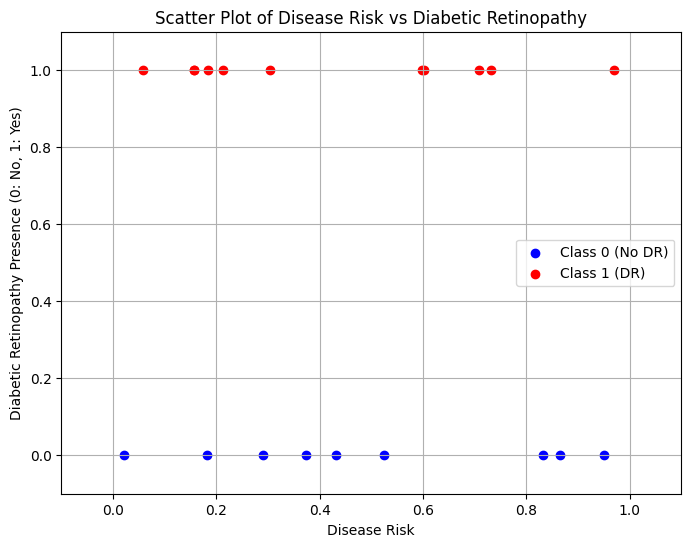

In [12]:
#12 Simulated Data Plot: Disease Risk vs Diabetic Retinopathy (DR)
import numpy as np
import matplotlib.pyplot as plt

# Simulated data points based on RFMiD dataset features
np.random.seed(42)  # For reproducibility
# Simulating Disease Risk scores between 0 and 1
Disease_Risk = np.random.rand(20)
# Simulating Diabetic Retinopathy presence (0 or 1)
DR = np.random.randint(0, 2, size=20)

# Assign classes based on the presence of Diabetic Retinopathy
class0 = DR == 0  # Class 0 (No Diabetic Retinopathy)
class1 = DR == 1  # Class 1 (Diabetic Retinopathy)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Disease_Risk[class0], DR[class0], color='blue', label='Class 0 (No DR)')
plt.scatter(Disease_Risk[class1], DR[class1], color='red', label='Class 1 (DR)')
plt.title('Scatter Plot of Disease Risk vs Diabetic Retinopathy')
plt.xlabel('Disease Risk')
plt.ylabel('Diabetic Retinopathy Presence (0: No, 1: Yes)')
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.savefig('Scatter_Plot_Disease_Risk_and_DR.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid()
plt.show()

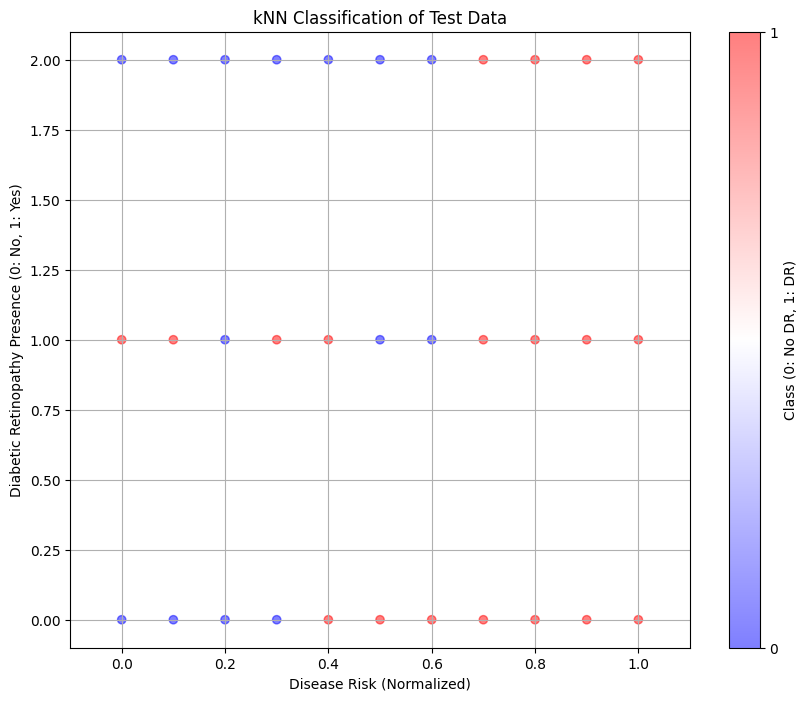

In [13]:
#13. kNN Classifier: Simulated Data for Disease Risk and Diabetic Retinopathy Prediction
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Simulated training data based on RFMiD dataset features
np.random.seed(42)

# Generate random training data: Disease Risk (feature 1) and Diabetic Retinopathy presence (feature 2)
# Here we simulate Disease Risk between 0 and 1 and DR as binary (0 or 1)
X_train = np.random.rand(20, 2)  # 20 samples with 2 features (Disease Risk, DR)
Y_train = np.array([(1 if dr == 1 else 0) for dr in np.random.randint(0, 2, size=20)])  # Class based on DR presence

# Generate test data for predictions
x_test = np.arange(0, 1.1, 0.1)  # Range for Disease Risk
y_test = np.arange(0, 2.1, 1)     # Range for Diabetic Retinopathy presence (0 or 1)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict classes for test data
Y_pred = knn.predict(X_test)

# Create scatter plot for test data output
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=plt.cm.bwr, alpha=0.5)
plt.title('kNN Classification of Test Data')
plt.xlabel('Disease Risk (Normalized)')
plt.ylabel('Diabetic Retinopathy Presence (0: No, 1: Yes)')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 2.1)
plt.colorbar(scatter, ticks=[0, 1], label='Class (0: No DR, 1: DR)')
plt.savefig('KNN_Classification(3).jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid()
plt.show()

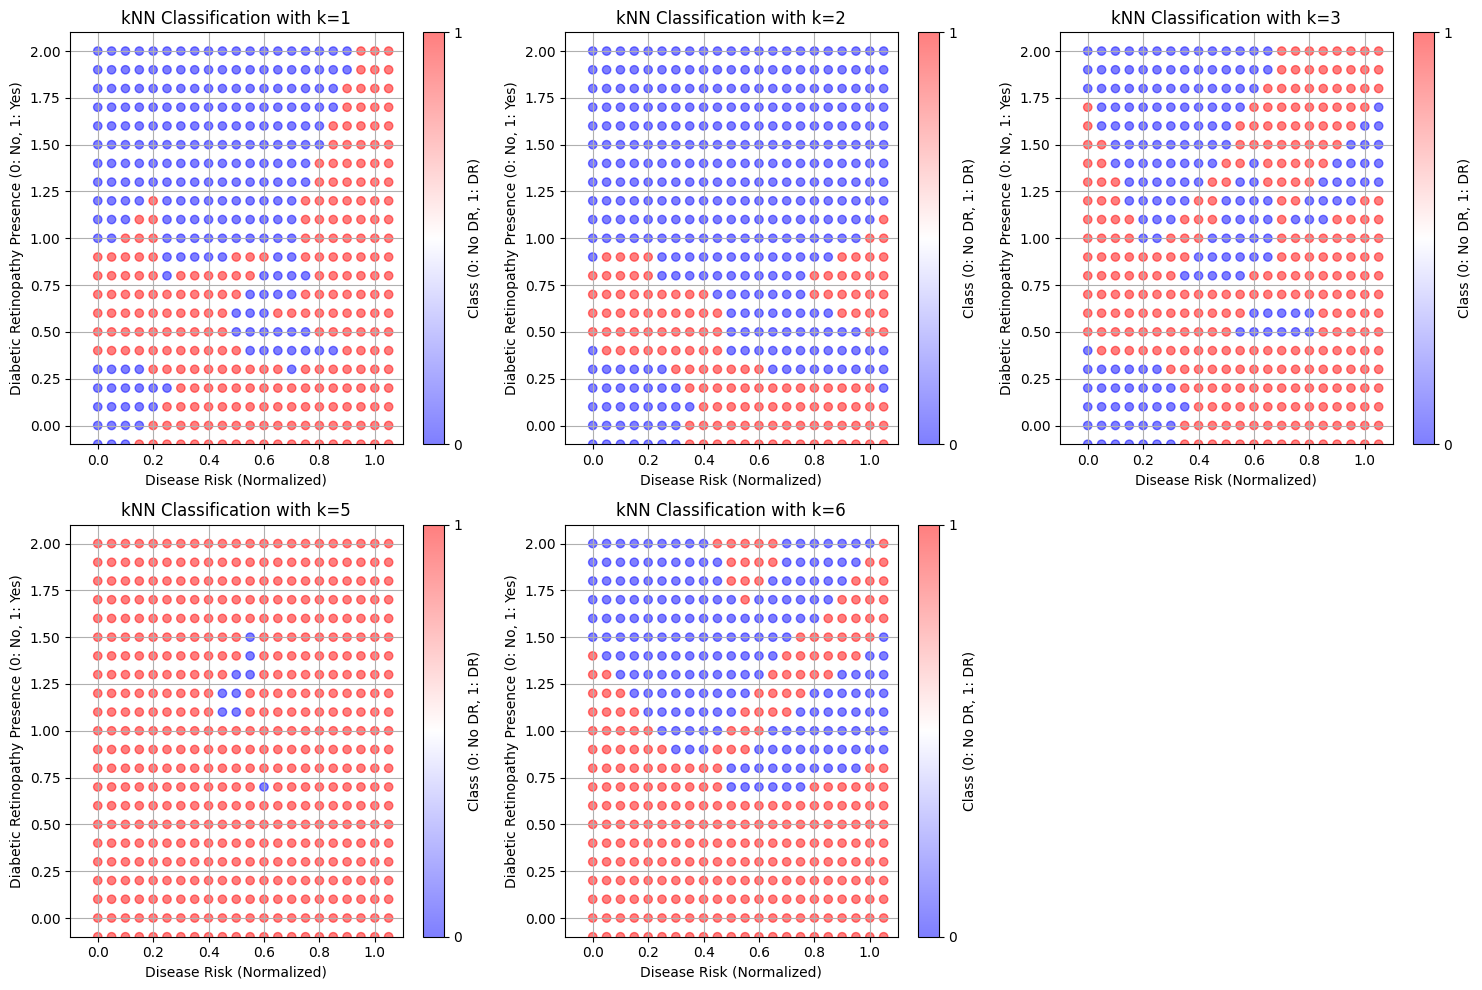

In [14]:
#14. kNN Classification: Exploring Multiple k Values for Diabetic Retinopathy Prediction
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate random training data: Disease Risk (feature 1) and Diabetic Retinopathy presence (feature 2)
X_train = np.random.rand(20, 2)  # 20 samples with 2 features (Disease Risk, DR)
Y_train = np.array([(1 if dr == 1 else 0) for dr in np.random.randint(0, 2, size=20)])  # Class based on DR presence

# Generate test data for predictions
x_test = np.arange(0, 1.1, 0.05)  # Range for Disease Risk
y_test = np.arange(-0.1, 2.1, 0.1) # Range for Diabetic Retinopathy presence (0 or 1)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)

# List of k values to evaluate
k_values = [1, 2, 3, 5, 6]

# Set up the plot
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Train kNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Predict classes for test data
    Y_pred = knn.predict(X_test)

    # Create scatter plot for test data output
    plt.subplot(2, 3, i + 1)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=plt.cm.bwr, alpha=0.5)
    plt.title(f'kNN Classification with k={k}')
    plt.xlabel('Disease Risk (Normalized)')
    plt.ylabel('Diabetic Retinopathy Presence (0: No, 1: Yes)')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 2.1)
    plt.colorbar(scatter, ticks=[0, 1], label='Class (0: No DR, 1: DR)')
    plt.savefig('KNN_Classification(Range).jpg', dpi=300)  # Adjust filename and dpi as needed

    plt.grid()

plt.tight_layout()
plt.show()

In [15]:
#15.Hyperparameter Tuning for kNN Classifier: GridSearchCV on Disease Risk and DR Data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your RFMiD dataset
dataset = pd.read_csv('RFMiD_Training_Labels.csv')

# Assuming the dataset contains 'Disease_Risk' and another feature, e.g., 'DR' (Diabetic Retinopathy)
# Adjust the column names based on your actual dataset structure
X = dataset[['DR', 'Disease_Risk']].values  # Features: DR and Disease Risk
Y = dataset['Disease_Risk'].values  # Target variable: Disease Risk

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': [1, 2, 3, 5, 6]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best k value: {grid_search.best_params_["n_neighbors"]}')



Best k value: 1


In [16]:
#MLP Classifier: Training and Evaluation on RFMiD Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the RFMiD dataset
data = pd.read_csv('RFMID_Training_Labels.csv')

# Separate features and labels
X = data.drop('Disease_Risk', axis=1)  
y = data['Disease_Risk'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9895833333333334
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       119
           1       1.00      0.99      0.99       457

    accuracy                           0.99       576
   macro avg       0.98      0.99      0.98       576
weighted avg       0.99      0.99      0.99       576



Training Accuracy: 1.00
Test Accuracy: 0.99


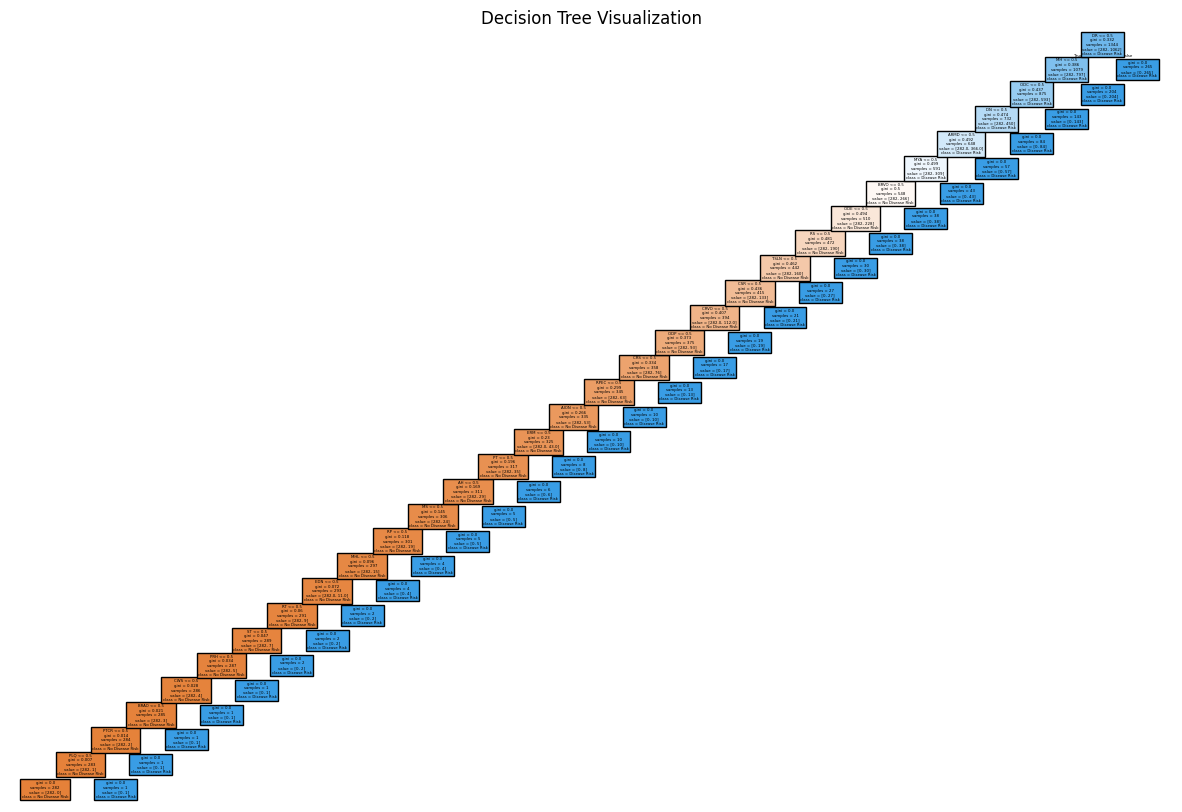

In [17]:
#Decision Tree Classifier: Training, Evaluation, and Visualization
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load your dataset
dataset = pd.read_csv('RFMiD_Training_Labels.csv')

# Specify features and target variable
# Assuming 'Disease_Risk' is the target column
X = dataset.drop(columns=['ID', 'Disease_Risk'])  # Adjust as per your dataset
y = dataset['Disease_Risk']

# Split data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(Tr_X, Tr_y)

# Check accuracy for training and test data
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Disease Risk", "Disease Risk"])
plt.title("Decision Tree Visualization")

# Save the plot as an image file
plt.savefig('Decision_Tree_Visualization.jpg', dpi=300)  # You can adjust the filename and DPI as needed
plt.show()


Training Accuracy with max_depth=5: 0.79
Test Accuracy with max_depth=5: 0.79


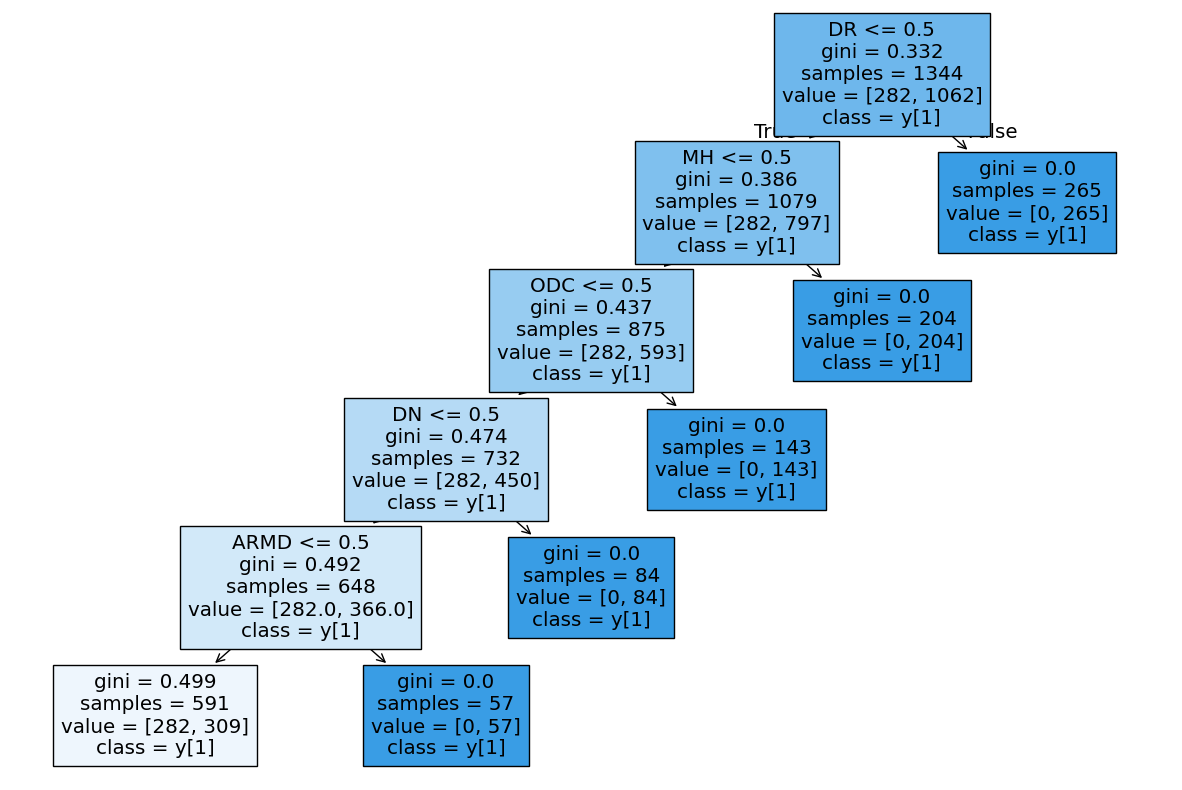

In [18]:
# Decision Tree Classifier with Depth Constraint: Performance and Visualization
model_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
model_depth.fit(Tr_X, Tr_y)

# Check accuracy for training and test data with depth constraint
train_accuracy_depth = model_depth.score(Tr_X, Tr_y)
test_accuracy_depth = model_depth.score(Te_X, Te_y)

print(f'Training Accuracy with max_depth=5: {train_accuracy_depth:.2f}')
print(f'Test Accuracy with max_depth=5: {test_accuracy_depth:.2f}')

# Visualize the Decision Tree with max_depth constraint
plt.figure(figsize=(15,10))
plot_tree(model_depth, filled=True, feature_names=X.columns, class_names=True)
plt.savefig('Decision Tree with max_depth constraint.jpg', dpi=300)  # You can adjust the filename and DPI as needed

plt.show()


Training Accuracy with entropy: 0.79
Test Accuracy with entropy: 0.79


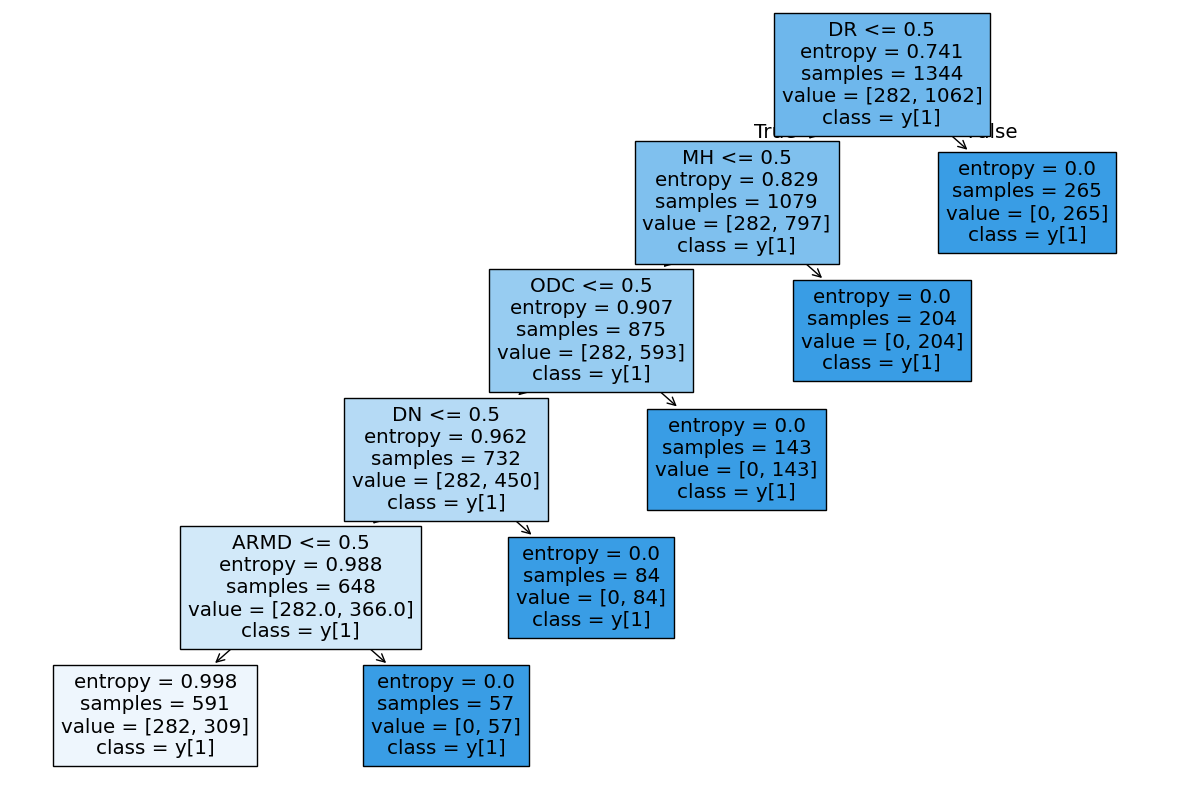

In [19]:
# Decision Tree Classifier with Entropy Criterion: Performance and Visualization
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model_entropy.fit(Tr_X, Tr_y)

# Check accuracy for training and test data with entropy criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f'Training Accuracy with entropy: {train_accuracy_entropy:.2f}')
print(f'Test Accuracy with entropy: {test_accuracy_entropy:.2f}')

# Visualize the Decision Tree with entropy criterion
plt.figure(figsize=(15,10))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=True)
plt.savefig('Decision Tree with entropy criterion.jpg', dpi=300)  # You can adjust the filename and DPI as needed

plt.show()


In [20]:
#Naive Bayes Classifier for Disease Risk Prediction
from sklearn.naive_bayes import GaussianNB
import numpy as np
# Load your own dataset
rfmid_data = pd.read_csv('RFMID_Training_Labels.csv')

# Prepare features and target (adapt according to your specific dataset)
X = rfmid_data.drop(columns=['Disease_Risk'])  # Assuming 'target' is the column you're predicting
y = rfmid_data['Disease_Risk']

# Train the Naive Bayes classifier
model = GaussianNB()
model.fit(X, y)

# Predict on a new sample (adjust based on your dataset)
sample_data = X.iloc[0:1]  # First row as an example
prediction = model.predict(sample_data)
print(f"Prediction: {prediction[0]}")


Prediction: 1


In [21]:
#AdaBoost Classifier with Decision Tree Base Estimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Assuming the last column is the target label and the rest are features
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values    # Target labels

# Check class distribution
print("Class distribution:\n", pd.Series(y).value_counts())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base classifier with class weights
base_classifier = DecisionTreeClassifier(max_depth=1, class_weight='balanced')

# Create an AdaBoost classifier using the SAMME algorithm
ada_boost = AdaBoostClassifier(estimator=base_classifier, n_estimators=50, random_state=42, algorithm='SAMME')

# Fit the model on the training data
ada_boost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_boost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Check unique labels and generate the confusion matrix
unique_classes = np.unique(y)
confusion_mat = confusion_matrix(y_test, y_pred, labels=unique_classes)
print("Confusion Matrix:\n", confusion_mat)

# Print the classification report with zero_division parameter
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=unique_classes, zero_division=0))


Class distribution:
 0    1919
1       1
Name: count, dtype: int64
Accuracy: 1.0
Confusion Matrix:
 [[576   0]
 [  0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.00      0.00      0.00         0

    accuracy                           1.00       576
   macro avg       0.50      0.50      0.50       576
weighted avg       1.00      1.00      1.00       576



In [22]:
#XGBoost Classifier for Disease Risk Prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Assuming the last column is the target label and the rest are features
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target labels

# Check class distribution
print("Class distribution:\n", pd.Series(y).value_counts())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Learning rate
    max_depth=3,            # Maximum depth of a tree
    random_state=42,        # For reproducibility
    scale_pos_weight=1,     # Adjust for class imbalance if needed
)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Check unique labels and generate the confusion matrix
unique_classes = np.unique(y)
confusion_mat = confusion_matrix(y_test, y_pred, labels=unique_classes)
print("Confusion Matrix:\n", confusion_mat)

# Print the classification report with zero_division parameter
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=unique_classes, zero_division=0))


Class distribution:
 0    1919
1       1
Name: count, dtype: int64
Accuracy: 1.0
Confusion Matrix:
 [[576   0]
 [  0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       0.00      0.00      0.00         0

    accuracy                           1.00       576
   macro avg       0.50      0.50      0.50       576
weighted avg       1.00      1.00      1.00       576



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the RFMiD dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Choose two binary features: DR (independent) and ARMD (dependent)
X = df[['DR']]  # Independent variable (features)
y = df['ARMD']  # Dependent variable (target)

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and a classification report (with zero_division handling)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Accessing model parameters
print("Model Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)
print("Model's Parameters:", log_reg.get_params())


Test Set Accuracy: 93.75%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       360
           1       0.00      0.00      0.00        24

    accuracy                           0.94       384
   macro avg       0.47      0.50      0.48       384
weighted avg       0.88      0.94      0.91       384

Model Coefficients: [[-2.16102903]]
Intercept: [-2.75776651]
Model's Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [24]:
# Classification Report 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Use DR and ARMD for bi-class classification
X = df[['DR']]  # Independent variable (DR)
y = df['ARMD']  # Dependent variable (ARMD)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Perceptron": Perceptron(),
    "MLP": MLPClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Compare classifiers and track accuracy and time
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Test the model
    y_pred = clf.predict(X_test)
    
    # Measure accuracy and time
    accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Print the results
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Time taken for {name}: {elapsed_time:.4f} seconds")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)


Logistic Regression Accuracy: 93.75%
Time taken for Logistic Regression: 0.0070 seconds
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       360
           1       0.00      0.00      0.00        24

    accuracy                           0.94       384
   macro avg       0.47      0.50      0.48       384
weighted avg       0.88      0.94      0.91       384

--------------------------------------------------
k-NN Accuracy: 93.75%
Time taken for k-NN: 0.0236 seconds
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       360
           1       0.00      0.00      0.00        24

    accuracy                           0.94       384
   macro avg       0.47      0.50      0.48       384
weighted avg       0.88      0.94      0.91       384

--------------------------------------------------
SVM Accuracy: 93.75%
Time

In [25]:
# Import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Drop the class label columns ('DR' and 'ARMD') for clustering
X = df.drop(columns=['DR', 'ARMD'])

# Apply KMeans clustering with k=3 or k=5 (you can choose based on your dataset characteristics)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster_Labels'] = kmeans.labels_

# Display the cluster centroids and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Assigned Cluster Labels:\n", kmeans.labels_)


Cluster Centers:
 [[ 9.59500000e+02  8.15625000e-01  1.68750000e-01  9.68750000e-02
   5.00000000e-02  3.43750000e-02  8.43750000e-02 -1.99493200e-17
   2.18750000e-02  3.12500000e-03  3.12500000e-02  1.37500000e-01
   2.34375000e-02  3.12500000e-03  4.68750000e-03  3.75000000e-02
   4.53125000e-02  1.56250000e-03  1.87500000e-02  1.56250000e-03
   4.68750000e-03  3.43750000e-02  1.71875000e-02  6.25000000e-03
   1.40625000e-02  7.81250000e-03  1.56250000e-03  1.56250000e-03
   1.56250000e-03  0.00000000e+00  2.60208521e-18  3.12500000e-03
   0.00000000e+00  1.56250000e-03 -9.10729825e-18  3.12500000e-03
   3.12500000e-03 -9.10729825e-18  1.56250000e-03  1.56250000e-03
   1.56250000e-03  3.12500000e-03  1.30104261e-18  1.30104261e-18
   1.30104261e-18]
 [ 1.60000000e+03  6.98907956e-01  1.31045242e-01  4.05616225e-02
   4.36817473e-02  3.58814353e-02  7.33229329e-02  6.24024961e-03
   1.40405616e-02  1.56006240e-03  1.56006240e-03  1.56006240e-01
   6.24024961e-03  3.12012480e-03  1.09

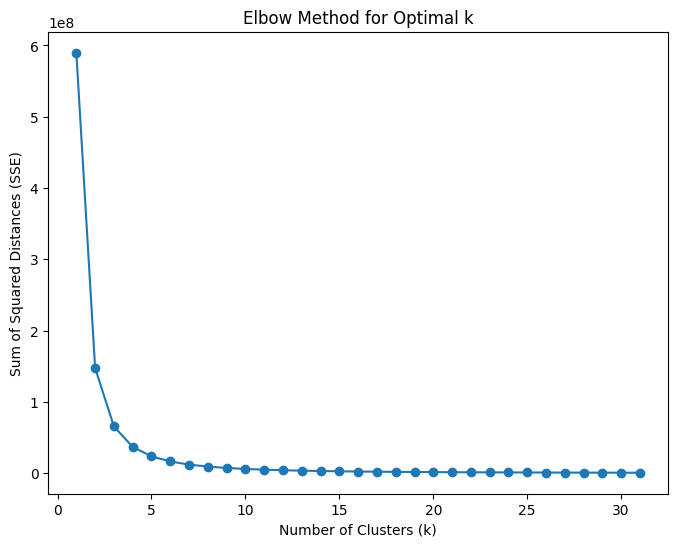

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

# Define the range of k values
k_range = range(1, 32)
sse = []  # Sum of squared distances for each k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Sum of squared distances to closest cluster center
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()


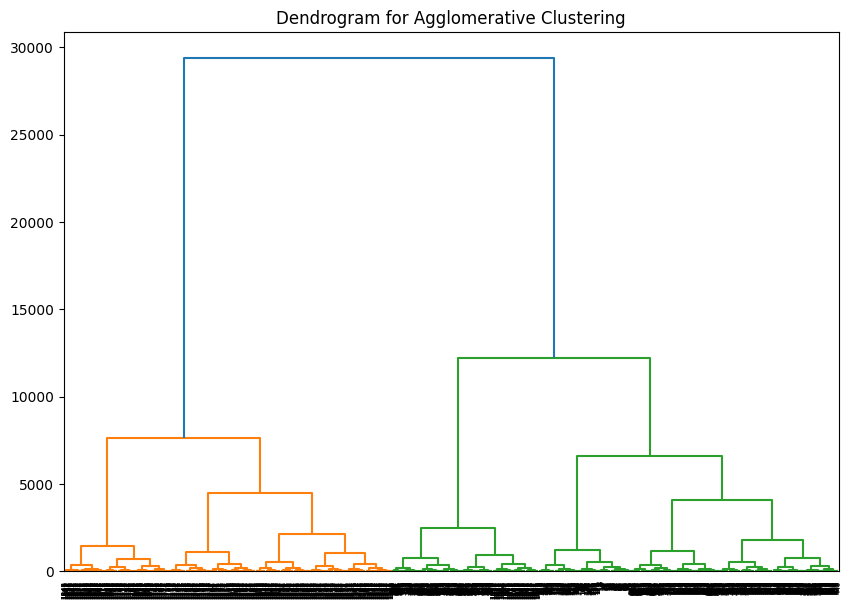

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Compute the linkage for dendrogram
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Prepare the features and target
X = df.drop(columns=['DR', 'ARMD'])  # Features
y = df['DR']  # Target (using 'DR' as an example; adjust as needed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Apply Sequential Feature Selector (forward selection)
sfs_forward = SequentialFeatureSelector(log_reg, n_features_to_select='auto', direction='forward')
sfs_forward.fit(X_train, y_train)

# Get the selected features for forward selection
selected_features_forward = X.columns[sfs_forward.get_support()]
print("Selected Features (Forward Selection):", selected_features_forward)

# Apply Sequential Feature Selector (backward selection)
sfs_backward = SequentialFeatureSelector(log_reg, n_features_to_select='auto', direction='backward')
sfs_backward.fit(X_train, y_train)

# Get the selected features for backward selection
selected_features_backward = X.columns[sfs_backward.get_support()]
print("Selected Features (Backward Selection):", selected_features_backward)


Selected Features (Forward Selection): Index(['ID', 'Disease_Risk', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS',
       'MS', 'CSR', 'ODC', 'CRVO', 'AH', 'ODP', 'ODE', 'AION', 'PT', 'RS',
       'CRS', 'RPEC', 'MHL'],
      dtype='object')
Selected Features (Backward Selection): Index(['Disease_Risk', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'AH', 'ODP', 'ODE', 'AION', 'PT', 'RS', 'CRS',
       'EDN', 'RPEC', 'MHL', 'RP'],
      dtype='object')


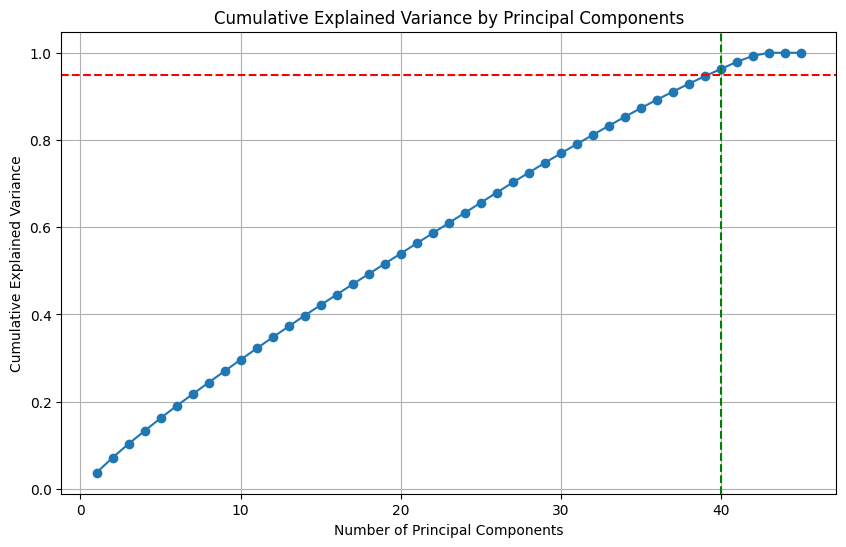

Number of components needed to capture 95% of the variance: 40


In [29]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Prepare the features (drop class labels)
X = df.drop(columns=['DR', 'ARMD'])  # Adjust as necessary

# Standardize the features (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line at 95%
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--')  # Vertical line for K
plt.grid()
plt.show()

# Determine the number of components needed to capture 95% of the variance
K = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to capture 95% of the variance: {K}")


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Prepare the features and target
X = df.drop(columns=['DR', 'ARMD'])  # Adjust as necessary
y = df['DR']  # Example target, you can choose 'ARMD' as needed

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Determine the number of components needed to capture 95% of the variance
K = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed to capture 95% of the variance: {K}")

# Transform the data with the first K principal components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_scaled)

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the PCA-transformed data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model using the first {K} principal components: {accuracy:.2f}")


Number of components needed to capture 95% of the variance: 40
Accuracy of the Logistic Regression model using the first 40 principal components: 0.80


In [31]:
#A4
from sklearn.cluster import KMeans
import pandas as pd

# Load your dataset

# Define features (X) for clustering, excluding the target variable
X = df.drop(columns=['ID', 'Disease_Risk'])  # Adjust as needed

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

# Retrieve cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Print the results
print(f"Cluster Labels: {labels}")
print(f"Cluster Centers: {centers}")


Cluster Labels: [0 0 0 ... 0 0 0]
Cluster Centers: [[ 2.20212102e-01  5.92638802e-02  6.10622664e-16  8.10979414e-02
   5.55208983e-02  4.36681223e-02  8.42170930e-02  8.73362445e-03
   2.93200250e-02  6.86213350e-03  2.30817218e-02  1.44728634e-01
   1.68434186e-02  3.74298191e-03  9.35745477e-03  3.74298191e-02
   3.61821585e-02  3.11915159e-03  1.06051154e-02  6.86213350e-03
   8.10979414e-03  2.68247037e-02  1.80910792e-02  8.10979414e-03
   1.37242670e-02  6.23830318e-03  3.74298191e-03  1.87149095e-03
   6.23830318e-04  0.00000000e+00  1.24766064e-03  1.87149095e-03
   0.00000000e+00  1.24766064e-03  1.87149095e-03  2.49532127e-03
   3.11915159e-03  1.87149095e-03  6.23830318e-04  6.23830318e-04
   6.23830318e-04  6.23830318e-04  6.23830318e-04  6.23830318e-04
   6.23830318e-04]
 [ 7.25552050e-02  1.57728707e-02  1.00000000e+00  2.52365931e-02
   3.78548896e-02  9.46372240e-03  1.60883281e-01  2.60208521e-18
   1.38777878e-17  1.26182965e-02 -6.93889390e-18  1.57728707e-01
   3.1

In [32]:
#A5
# Calculate evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
db_index = davies_bouldin_score(X, labels)

# Print the results
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.25
Calinski-Harabasz Score: 334.60
Davies-Bouldin Index: 1.41


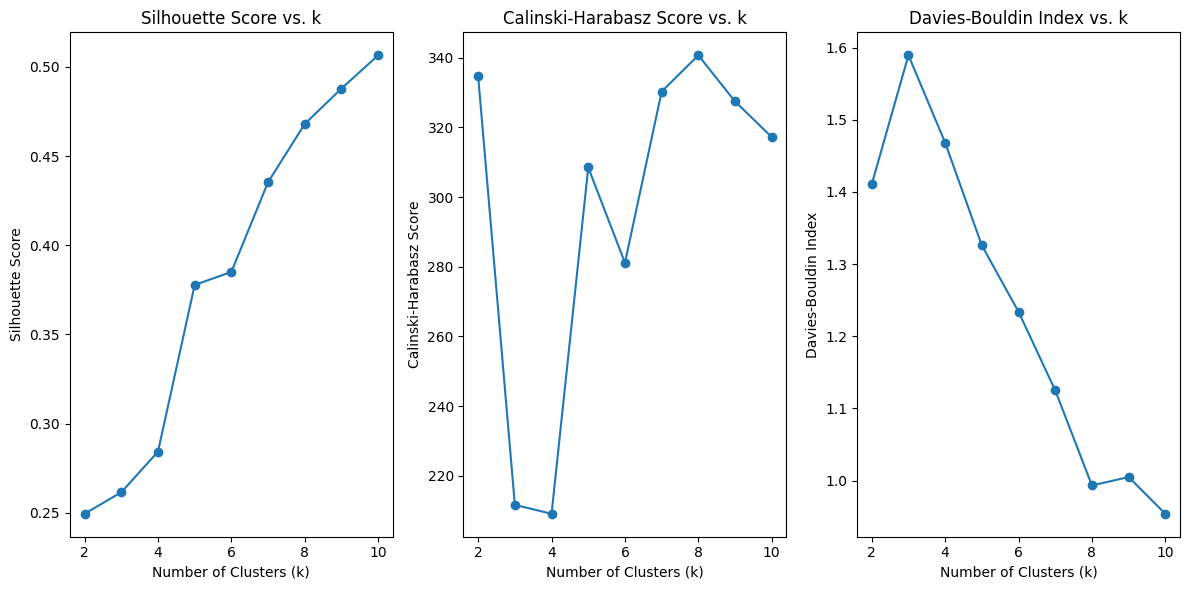

In [33]:
#A6
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define features (X) for clustering, excluding the target variable
X = df.drop(columns=['ID', 'Disease_Risk'])  # Adjust as needed

# Range of k values to evaluate
k_values = range(2, 11)  # Adjust as needed
silhouette_scores = []
ch_scores = []
db_indexes = []

# Perform k-means clustering for each k and calculate metrics
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    labels = kmeans.labels_
    
    silhouette_scores.append(silhouette_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_indexes.append(davies_bouldin_score(X, labels))

# Plotting the scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_indexes, marker='o')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.savefig('clustering_metrics_scores.jpg', dpi=300)  # Adjust filename and dpi as needed
plt.tight_layout()
plt.show()


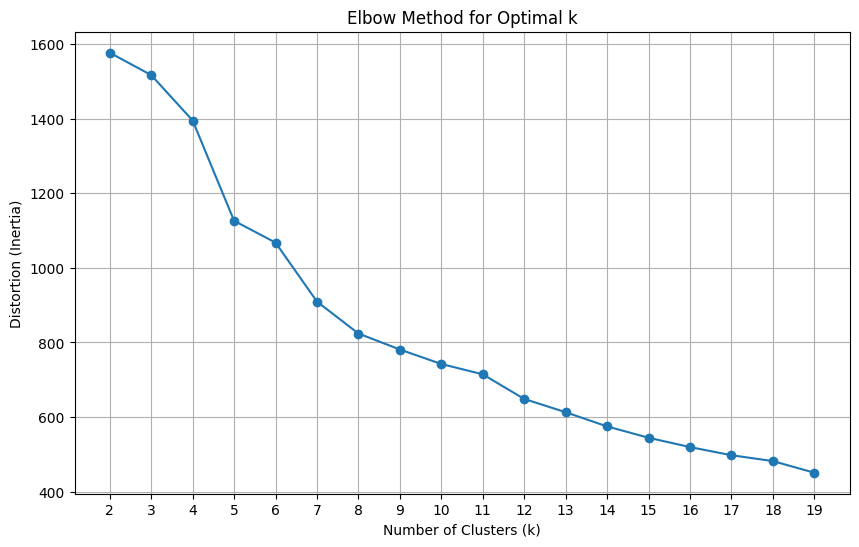

In [34]:
#A7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define features (X) for clustering, excluding the target variable
X = df.drop(columns=['ID', 'Disease_Risk'])  # Adjust as needed

# List to hold the distortion values
distortions = []

# Evaluate k values from 2 to 20
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    distortions.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(range(2, 20))  # Set x-ticks for clarity
plt.savefig('Elbow plot for Optimal K.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid()
plt.show()
